In [95]:
from src import load_data
from src import embeddings

df_b, df_r = load_data.load_yelp_data()
df_b.head()
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,39.952103,-75.172753
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,40.079848,-75.025080
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,39.938013,-75.148131
3,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,39.949529,-75.152139
4,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,39.948949,-75.169532


In [101]:
import numpy as np
import pandas as pd
import math


df = pd.read_csv("data/df_b_processed.csv")
df = df.drop_duplicates()



df.drop('hours',axis=1)



def local_businesses(dataset, latitude, longitude, miles):
    # latitude and longitude define the center of the station, miles designates 
    # how big of a circle/area you want to draw around the station
    rows=[]
    for index in range(len(dataset)):
        lat=dataset.loc[index]['latitude']
        long=dataset.loc[index]['longitude']
        distance = math.hypot(lat-latitude,long-longitude)
        if distance < miles/69:
            rows.append(dataset.iloc[index])
    return pd.DataFrame(rows).reset_index(drop=True)
df_located = (local_businesses(df_r,40.02,-75.16,1))
df_located.head()
# print(len(df_located))

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
0,aLQuFI8cOpIcrurgDtK1SA,WeByn529VPbHK53DWwGrpg,f88P1gIbRpRzsYAHj9hGdA,5,1,0,1,This place is a gem and has been for many year...,2016-01-17 10:31:11,40.023383,-75.148359
1,wFQdeIrD45_8eRFnAnSZHQ,ocFniU3muXVYiwB-ieuMHQ,lccVg98PECC-2mKivDgaVg,1,3,1,1,Not only was the driver reckless and erratic i...,2012-04-28 16:49:29,40.012399,-75.150699
2,QUZ9V3USdv26dE1vHNscdw,mnrfIKvAUNsjg8CW7FaxsA,s_ypQXJm1d94PfmY6JLzRA,4,0,0,0,This place rules. Seriously. Awesome clothin...,2013-03-18 18:00:36,40.032042,-75.167607
3,f3_6jzpNgzBqOhGAD7t7GA,p9hNfx2OhQV_b_L6apemxw,4S_yN5o0EvXvV6GNvesTKw,5,1,0,0,i found this by accident was hungry at work a...,2017-08-08 13:42:52,40.022826,-75.159091
4,6j0LrZuV1mOOmlJESGfXMA,ipVw_xRytKs4iJp-F2JoYg,KnyuQ1D7QE7X8eMk8T3kTA,5,0,0,0,Whose ever momma they have chiefing in the bac...,2018-07-26 20:37:54,40.031731,-75.167799


In [109]:
df_located.sort_values('date')
df_located['date']=pd.to_datetime(df_located['date'])
df_located['Year']=df_located['date'].dt.year
df_located.head()
# yeared= local_businesses['date'].dt.year


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude,Year
0,aLQuFI8cOpIcrurgDtK1SA,WeByn529VPbHK53DWwGrpg,f88P1gIbRpRzsYAHj9hGdA,5,1,0,1,This place is a gem and has been for many year...,2016-01-17 10:31:11,40.023383,-75.148359,2016
1,wFQdeIrD45_8eRFnAnSZHQ,ocFniU3muXVYiwB-ieuMHQ,lccVg98PECC-2mKivDgaVg,1,3,1,1,Not only was the driver reckless and erratic i...,2012-04-28 16:49:29,40.012399,-75.150699,2012
2,QUZ9V3USdv26dE1vHNscdw,mnrfIKvAUNsjg8CW7FaxsA,s_ypQXJm1d94PfmY6JLzRA,4,0,0,0,This place rules. Seriously. Awesome clothin...,2013-03-18 18:00:36,40.032042,-75.167607,2013
3,f3_6jzpNgzBqOhGAD7t7GA,p9hNfx2OhQV_b_L6apemxw,4S_yN5o0EvXvV6GNvesTKw,5,1,0,0,i found this by accident was hungry at work a...,2017-08-08 13:42:52,40.022826,-75.159091,2017
4,6j0LrZuV1mOOmlJESGfXMA,ipVw_xRytKs4iJp-F2JoYg,KnyuQ1D7QE7X8eMk8T3kTA,5,0,0,0,Whose ever momma they have chiefing in the bac...,2018-07-26 20:37:54,40.031731,-75.167799,2018


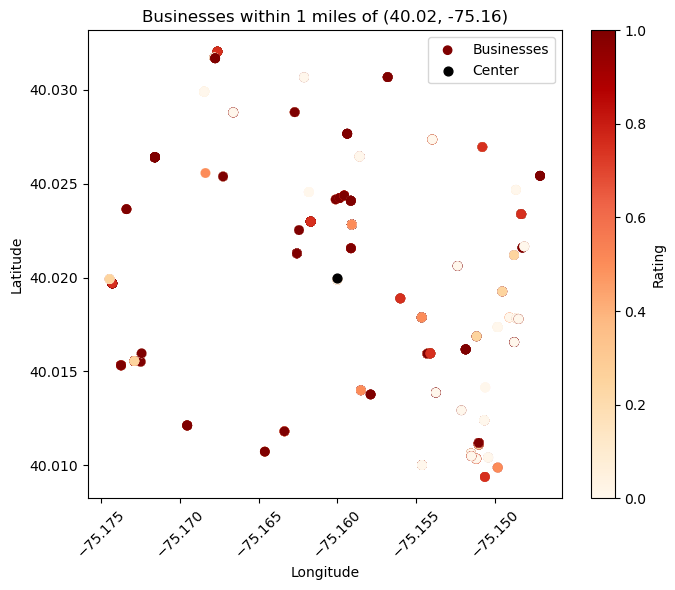

In [103]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_businesses(df_local,latitude, longitude, miles,date=None):
    # if date != None:
    #     df_local = 
    if 'stars' not in df_local.columns:
        df_local['stars']=0.0
    df_local['stars']=df_local['stars'].fillna(0.0)   
    stars = df_local['stars'] 
    norm = (stars -stars.min())/(stars.max()-stars.min()+1e-10)
    
    fig,ax = plt.subplots(figsize=(7,6))
    scatter = ax.scatter(df_local['longitude'],df_local['latitude'],c=norm,cmap='OrRd',label='Businesses')
    ax.scatter(x=longitude,y=latitude,color='black',marker='o',s=40,label = 'Center')
    fig.colorbar(scatter,label='Rating')
    ax.tick_params(axis='x', labelrotation=45)  
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"Businesses within {miles} miles of ({latitude}, {longitude})")
    ax.legend()
    plt.tight_layout()
    plt.show()
(plot_businesses(df_located,40.02,-75.16,1))
